<a href="https://colab.research.google.com/github/kushiknaveen/basic-ml-project/blob/main/basic_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic ML Project

## Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kushiknaveen/datasets/main/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0,0.000000,-2.180
1,2.37650,133.405,0,0.000000,-2.000
2,2.59380,167.850,1,0.000000,-1.740
3,2.02890,133.405,1,0.000000,-1.480
4,2.91890,187.375,1,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8,0.000000,1.144
1140,3.42130,286.114,2,0.333333,-4.925
1141,3.60960,308.333,4,0.695652,-3.893
1142,2.56214,354.815,3,0.521739,-3.790


## Data Preparation

### Data separation as X and y

In [8]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [9]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0,0.000000
1,2.37650,133.405,0,0.000000
2,2.59380,167.850,1,0.000000
3,2.02890,133.405,1,0.000000
4,2.91890,187.375,1,0.000000
...,...,...,...,...
1139,1.98820,287.343,8,0.000000
1140,3.42130,286.114,2,0.333333
1141,3.60960,308.333,4,0.695652
1142,2.56214,354.815,3,0.521739


### Data splitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [12]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5,0.000000
378,-2.07850,142.070,0,0.000000
529,-0.47730,168.152,0,0.000000
546,-0.86740,154.125,0,0.000000
320,1.62150,100.161,2,0.000000
...,...,...,...,...
802,3.00254,250.301,1,0.842105
53,2.13860,82.146,3,0.000000
350,5.76304,256.348,0,0.900000
79,3.89960,186.339,10,0.000000


In [13]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7,0.000000
118,7.27400,360.882,1,0.666667
347,1.94040,145.161,0,0.909091
1123,1.98640,119.378,0,0.000000
924,1.70062,108.140,0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4,0.000000
427,6.32820,276.338,0,1.000000
711,0.04430,218.205,5,0.000000
4,2.91890,187.375,1,0.000000


## *Model Building*

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

Training the model

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Applying the model to make a prediction

In [16]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [31]:
#y_lr_train_pred

In [32]:
#y_lr_test_pred

**Evaluate Model Performance**

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [26]:
print("LR MSE (Train): ", lr_train_mse)
print("LR MSE (Test): ", lr_test_mse)
print("LR R2 (Train)", lr_train_r2)
print("LR R2 (Test)",lr_test_r2)

LR MSE (Train):  1.0075362951071338
LR MSE (Test):  1.0206953660981828
LR R2 (Train) 0.7645051774668614
LR R2 (Test) 0.7891616188538331


In [30]:
lr_results = pd.DataFrame(['Linear Regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [34]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [35]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [36]:
print("LR MSE (Train): ", rf_train_mse)
print("LR MSE (Test): ", rf_test_mse)
print("LR R2 (Train)", rf_train_r2)
print("LR R2 (Test)",rf_test_r2)

LR MSE (Train):  1.028227802112806
LR MSE (Test):  1.407688264904896
LR R2 (Train) 0.7596688824431413
LR R2 (Test) 0.7092230211002489


In [37]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Model Comparison

In [43]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)

In [44]:
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization of Predicted results

In [49]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experiment logS')

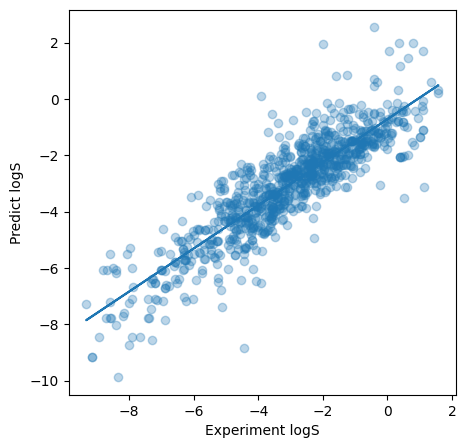

In [50]:
plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train))
plt.ylabel('Predict logS')
plt.xlabel('Experiment logS')